<a href="https://colab.research.google.com/github/rajeevfromkrec/deep_learning/blob/master/NLP_embedding_and_classification_of_document_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-05-31 04:16:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.07s   

2020-05-31 04:16:43 (71.6 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [0]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = 'oov'
training_portion = .8

In [6]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))

153


In [0]:
sentences = []
labels = []
with open("/tmp/bbc-text.csv", 'r') as csvfile:
  csv_reader = csv.DictReader(csvfile)
  for item in csv_reader:
    sentences.append(item['text'])
    labels.append(item['category'])

In [8]:
train_size = 1780

train_sentences = sentences[0:train_size]
train_labels = labels[0:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [9]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok )
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index


train_sequences = tokenizer.texts_to_sequences(train_sentences)

train_padded = pad_sequences(train_sequences,padding=padding_type ,maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

750
120
300
120
311
120


In [10]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences,padding=padding_type,maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 120)


In [11]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)
type(validation_label_seq)

[5]
[2]
[1]
(1780, 1)
[4]
[5]
[3]
(445, 1)


numpy.ndarray

In [18]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.GlobalAveragePooling1D(),
                                    tf.keras.layers.Dense(24,activation='relu'),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Dense(6,activation='softmax')

])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
batch_normalization (BatchNo (None, 120, 16)           64        
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 150       
Total params: 16,622
Trainable params: 16,590
Non-trainable params: 32
_________________________________________________

In [20]:
num_epochs = 40
history = model.fit(train_padded,training_label_seq,epochs=num_epochs,validation_data=(validation_padded,validation_label_seq))

Epoch 1/40
56/56 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.9295 - val_accuracy: 0.8652
Epoch 2/40
56/56 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.9147 - val_accuracy: 0.8652
Epoch 3/40
56/56 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.8884 - val_accuracy: 0.8607
Epoch 4/40
56/56 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.8486 - val_accuracy: 0.8719
Epoch 5/40
56/56 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.9059 - val_accuracy: 0.8742
Epoch 6/40
56/56 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.9978 - val_loss: 0.8564 - val_accuracy: 0.8719
Epoch 7/40
56/56 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.9989 - val_loss: 0.8459 - val_accuracy: 0.8674
Epoch 8/40
56/56 [==

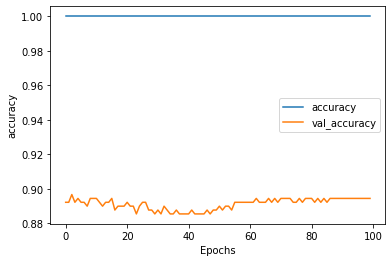

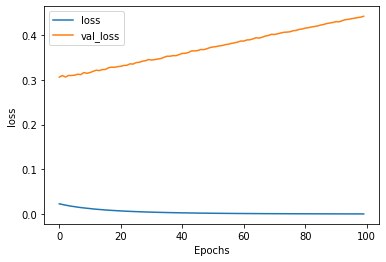

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [23]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(1000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')